# AED sur le dataset des stocks

Dans cette section, nous allons effectuer une analyse exploratoire des données (AED) sur le dataset `stocks`. Cette analyse nous permettra de mieux comprendre la structure des données, de détecter les valeurs manquantes, de visualiser les distributions des variables et d'identifier les relations potentielles entre les variables.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('../RAW_data/stocksV2.csv', sep=";")
data.head()

,date,id_produit,entrepot,niveau_stock
0,01/06/2024,P00001,Lyon,88
1,22/04/2024,P00001,Paris,141
2,25/09/2024,P00002,Lyon,286
3,18/02/2024,P00003,Paris,177
4,13/07/2024,P00003,Lyon,95


In [53]:
data.shape

(1706, 4)

In [54]:
data.describe()

,niveau_stock
count,1706.000000
mean,148.587925
std,88.078076
min,0.000000
25%,72.000000
50%,147.500000
75%,226.000000
max,299.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1706 non-null   object
 1   id_produit    1706 non-null   object
 2   entrepot      1706 non-null   object
 3   niveau_stock  1706 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 53.4+ KB


In [56]:
data.isnull().sum()

date            0
id_produit      0
entrepot        0
niveau_stock    0
dtype: int64

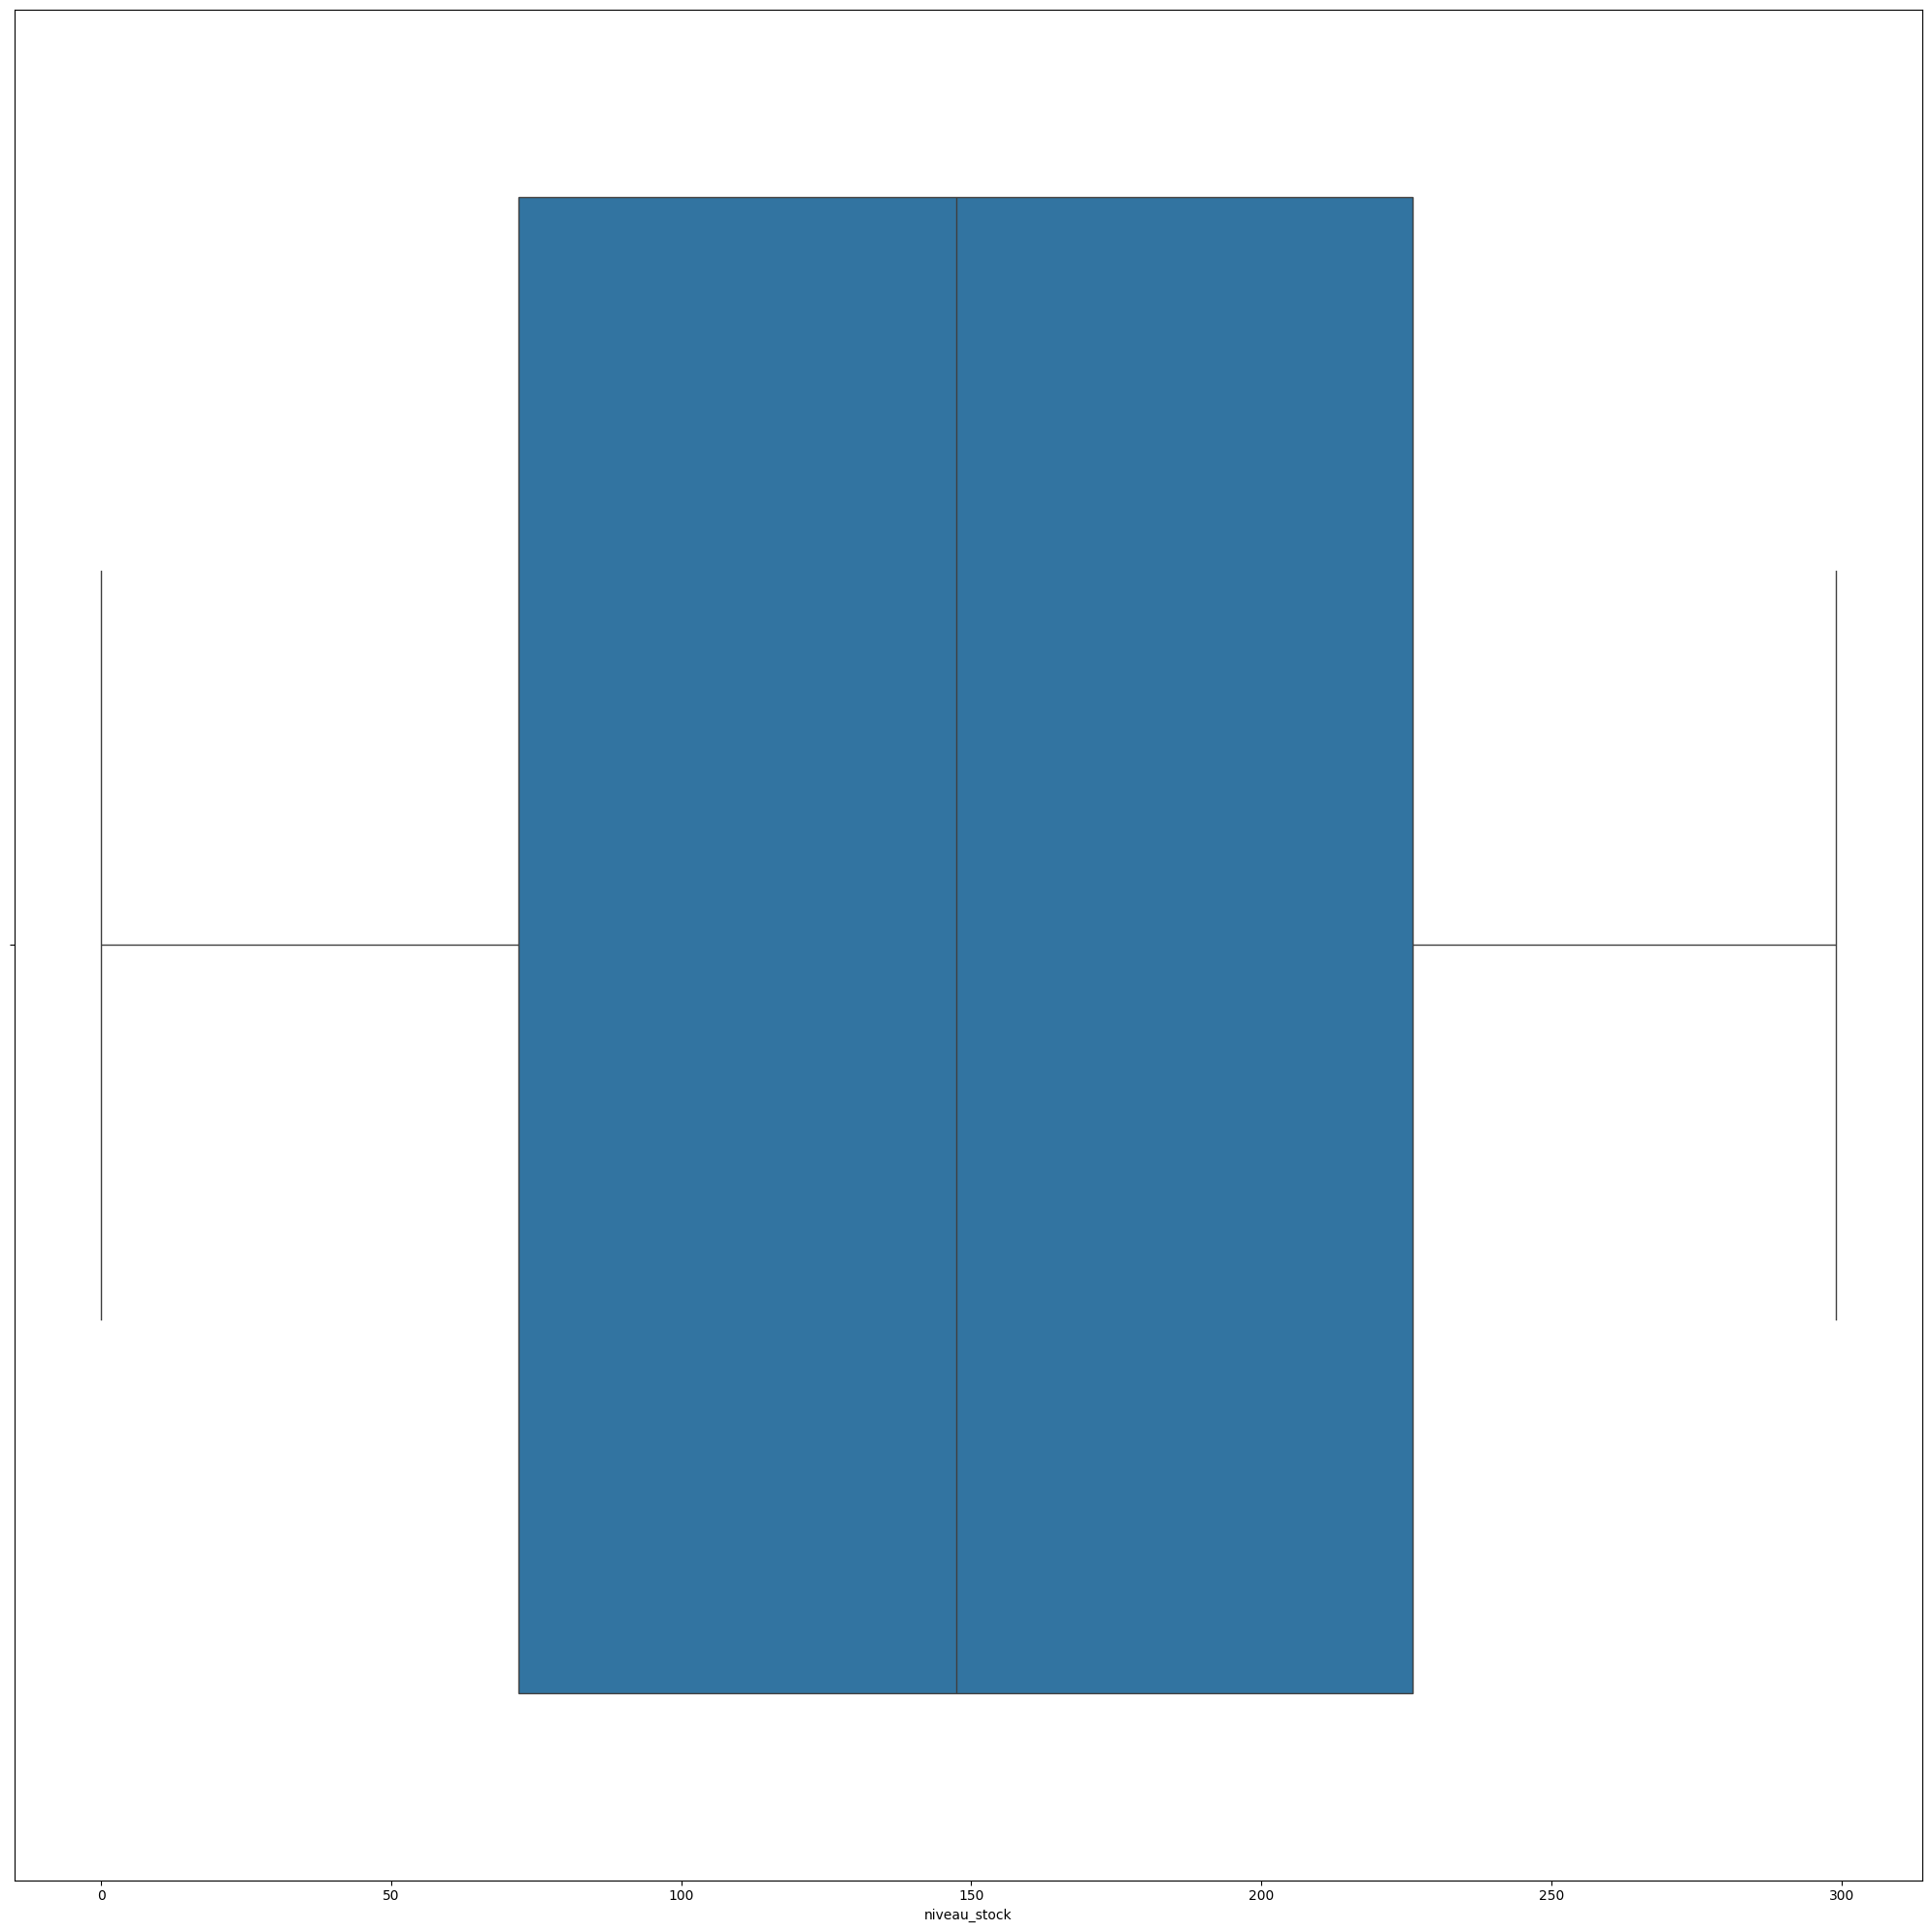

In [57]:
#on vient vérifier avec des boxplot si il y a des outliers (valeurs aberrantes)
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
sns.boxplot(x=data['niveau_stock'])
plt.tight_layout()
plt.show()

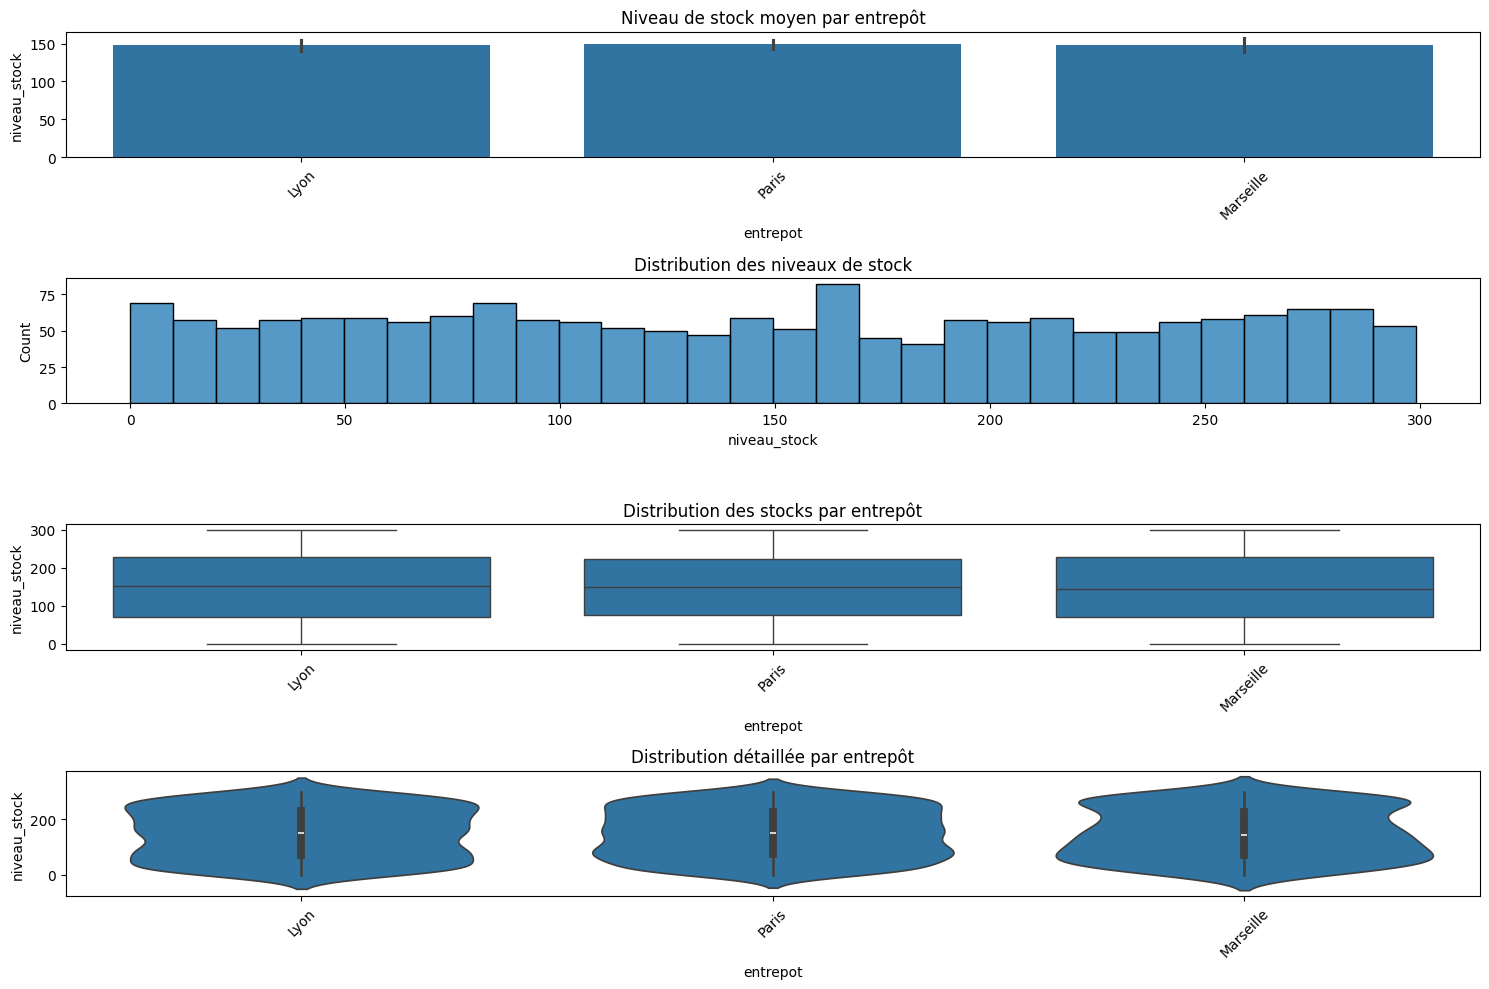

In [58]:
# Création d'une figure avec plusieurs sous-graphiques
plt.figure(figsize=(15, 10))

# Graphique 1 : Niveau de stock moyen par entrepôt
plt.subplot(4, 1, 1)
sns.barplot(x='entrepot', y='niveau_stock', data=data)
plt.title('Niveau de stock moyen par entrepôt')
plt.xticks(rotation=45)

# Graphique 2 : Distribution des niveaux de stock
plt.subplot(4, 1, 2)
sns.histplot(data=data, x='niveau_stock', bins=30)
plt.title('Distribution des niveaux de stock')

# Graphique 3 : Boîtes à moustaches des niveaux de stock par entrepôt
plt.subplot(4, 1, 3)
sns.boxplot(x='entrepot', y='niveau_stock', data=data)
plt.title('Distribution des stocks par entrepôt')
plt.xticks(rotation=45)

# Graphique 4 : Distribution détaillée des niveaux de stock par entrepôt (violin plot)
plt.subplot(4, 1, 4)
sns.violinplot(x='entrepot', y='niveau_stock', data=data)
plt.title('Distribution détaillée par entrepôt')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

```markdown
## Analyse des Visualisations

L'analyse des différents graphiques révèle plusieurs points importants sur la distribution des stocks :

1. **Distribution par entrepôt :**
    - Paris maintient généralement des niveaux de stock plus élevés
    - Lyon et Marseille présentent des niveaux de stock moyens similaires
    - La variabilité des stocks diffère légèrement selon les entrepôts

2. **Distribution globale des stocks :**
    - La distribution est relativement normale avec une légère asymétrie positive
    - La majorité des niveaux de stock se situe entre 100 et 300 unités
    - Quelques valeurs extrêmes sont présentes, principalement des stocks élevés

3. **Dispersion des données :**
    - Les boxplots et violin plots montrent une dispersion importante des données
    - Présence de quelques outliers, particulièrement pour des niveaux de stock élevés
    - La variabilité est plus importante à Paris que dans les autres entrepôts

Cette analyse suggère une gestion différenciée des stocks selon les entrepôts, avec Paris jouant potentiellement un rôle de hub central de distribution.
```